## EDA mit Umsätze- und Filialen-Daten

In diesem Notizbuch kombinieren wir Verkaufsdaten mit filialspezifischen Daten und führen explorative Analysen durch.

##### Importieren der notwendigen Bibliotheken:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_palette("Set2")
warnings.filterwarnings("ignore")
%matplotlib inline

##### Lesen der Verkaufsdaten

In [2]:
# we only need datapoints for open stores 
sales_df = pd.read_csv("../data/sales_clean.csv", parse_dates=['Date'])
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,no_holiday,1,31
1,2,5,2015-07-31,6064,625,1,1,no_holiday,1,31
2,3,5,2015-07-31,8314,821,1,1,no_holiday,1,31
3,4,5,2015-07-31,13995,1498,1,1,no_holiday,1,31
4,5,5,2015-07-31,4822,559,1,1,no_holiday,1,31


##### Verknüpfung mit den Daten der Filialen:

In [3]:
stores_df = pd.read_csv("../data/stores_clean.csv", parse_dates=['Promo2Since', 'CompetitionOpenSince'])
sales_stores_df = pd.merge(sales_df, stores_df, how = 'inner', on = 'Store')
# Save this data to csv file for later use
#sales_stores_df.to_csv("../data/sales_stores.csv", index=False)
sales_stores_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSince,Promo2,Promo2Since,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,no_holiday,1,31,c,a,1270.0,2008-09-01,0,NaT,NaN
1,2,5,2015-07-31,6064,625,1,1,no_holiday,1,31,a,a,570.0,2007-11-01,1,2010-03-29,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,no_holiday,1,31,a,a,14130.0,2006-12-01,1,2011-04-04,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,no_holiday,1,31,c,c,620.0,2009-09-01,0,NaT,NaN
4,5,5,2015-07-31,4822,559,1,1,no_holiday,1,31,a,a,29910.0,2015-04-01,0,NaT,NaN


##### EDA mit den Daten der Filialen:

###### StoreType

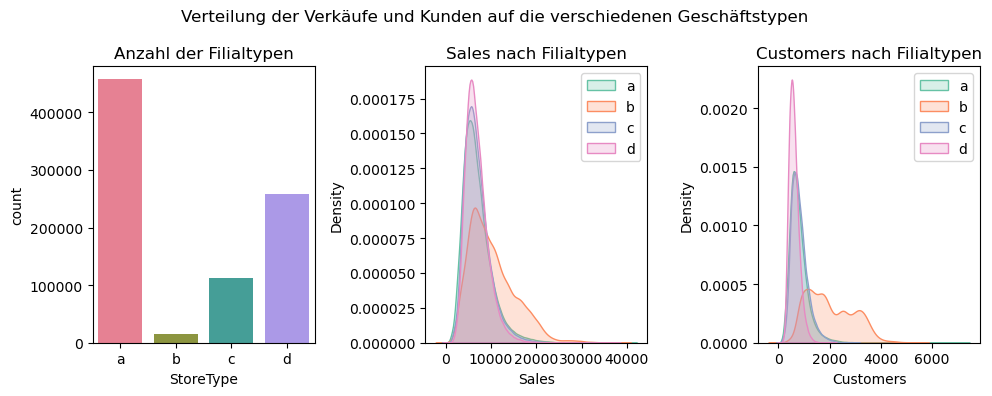

In [4]:
store_types = sales_stores_df['StoreType'].sort_values().unique()

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.title('Anzahl der Filialtypen')
sns.countplot(x = sales_stores_df['StoreType'].sort_values(), palette='husl')

plt.subplot(1, 3, 2)
plt.title('Sales nach Filialtypen')
for store_type in store_types:
    sns.kdeplot(x = sales_stores_df['Sales'][sales_stores_df['StoreType'] == store_type] , label = store_type, shade = True)
plt.legend(labels = store_types, loc = 'upper right')

plt.subplot(1, 3, 3)
plt.title('Customers nach Filialtypen')
for store_type in store_types:
    sns.kdeplot(x = sales_stores_df['Customers'][sales_stores_df['StoreType'] == store_type] , label = store_type, shade = True)
plt.legend(labels = store_types, loc = 'upper right')

plt.suptitle("Verteilung der Verkäufe und Kunden auf die verschiedenen Geschäftstypen")
plt.tight_layout();

In [5]:
by_store_type= sales_stores_df.groupby('StoreType')
by_store_type[['Sales', 'Customers']].describe(percentiles=[.5]).transpose()

StoreType                    a             b              c              d
Sales     count  457077.000000  15563.000000  112978.000000  258774.000000
          mean     6925.167661  10231.407505    6932.512755    6822.141881
          std      3277.786381   5157.190155    2897.564578    2556.582881
          min         0.000000      0.000000       0.000000       0.000000
          50%      6285.000000   9130.000000    6407.000000    6395.000000
          max     41551.000000  38722.000000   31448.000000   38037.000000
Customers count  457077.000000  15563.000000  112978.000000  258774.000000
          mean      795.361469   2021.822335     815.465887     606.339876
          std       387.564196    911.031277     329.744701     199.266174
          min         0.000000      0.000000       0.000000       0.000000
          50%       720.000000   1839.000000     756.000000     577.000000
          max      7388.000000   5494.000000    3096.000000    2239.000000

<!-- Filialen der Art `b` haben im Durchschnitt einen größeren Kundenstrom und erzielen höhere Gewinne. Es gibt aber weniger Filialen dieser Art. Geschäfte des Typs d haben das beste Verhältnis zwischen Umsatzvolumen und Kundenzahl. -->

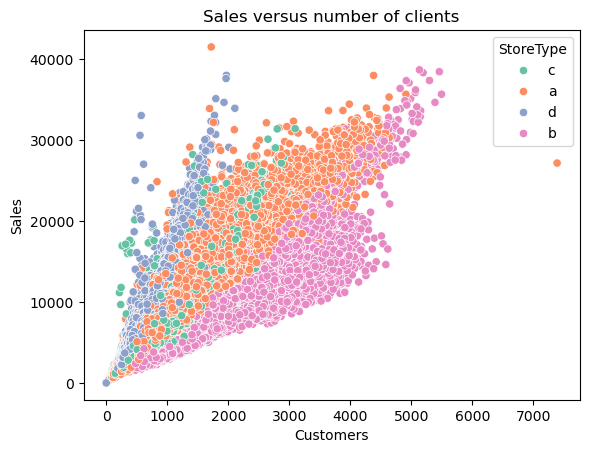

In [6]:
sns.scatterplot(x='Customers', y='Sales', data=sales_stores_df, hue='StoreType').set(title="Sales versus number of clients");

Filialen des Typs `b` haben im Durchschnitt mehr Kunden und mehr Umsatz, aber es gibt weniger Filialen dieses Typs.
Filialen des Typs `d` haben das beste Verhältnis zwischen Kundenzahl und Umsatzvolumen.

##### Assortment

In [7]:
dict_assort = {'a': 'basic', 'b': 'extra','c': 'extended'}
sales_stores_df['Assortment'] = sales_stores_df['Assortment'].apply(lambda x: dict_assort[x])

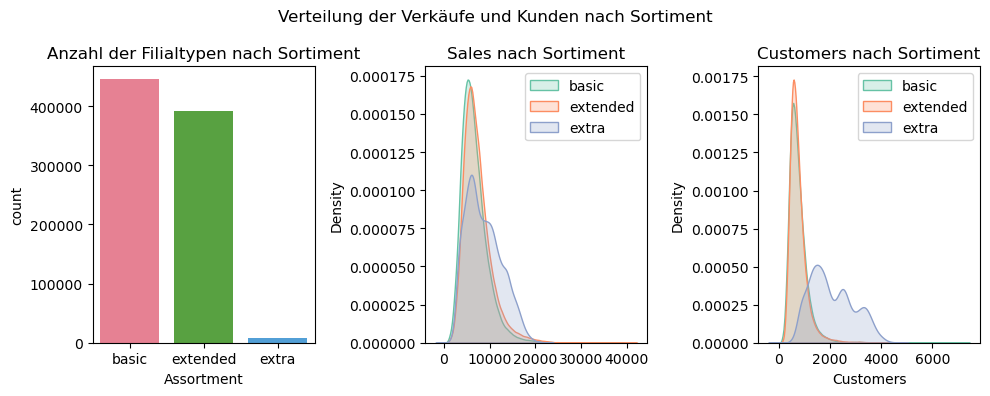

In [8]:
assortments = sales_stores_df['Assortment'].unique()

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.title('Anzahl der Filialtypen nach Sortiment')
sns.countplot(x = sales_stores_df['Assortment'], palette='husl')

plt.subplot(1, 3, 2)
plt.title('Sales nach Sortiment')
for assortment in assortments:
    sns.kdeplot(x = sales_stores_df['Sales'][sales_stores_df['Assortment'] == assortment] , label = assortment, shade = True)
plt.legend(labels = assortments, loc = 'upper right')

plt.subplot(1, 3, 3)
plt.title('Customers nach Sortiment')
for assortment in assortments:
    sns.kdeplot(x = sales_stores_df['Customers'][sales_stores_df['Assortment'] == assortment] , label = assortment, shade = True)
plt.legend(labels = assortments, loc = 'upper right')

plt.suptitle("Verteilung der Verkäufe und Kunden nach Sortiment")
plt.tight_layout();

In [9]:
by_assortment = sales_stores_df.groupby('Assortment')
by_assortment[['Sales', 'Customers']].describe(percentiles=[.5]).transpose()

Assortment               basic       extended         extra
Sales     count  444909.000000  391271.000000   8212.000000
          mean     6621.017039    7300.526339   8639.346322
          std      2972.500222    3184.144215   3806.006716
          min         0.000000       0.000000      0.000000
          50%      6082.000000    6675.000000   8081.000000
          max     38722.000000   41551.000000  22137.000000
Customers count  444909.000000  391271.000000   8212.000000
          mean      747.943822     752.169959   2066.795543
          std       371.894840     372.862670    847.438646
          min         0.000000       0.000000      0.000000
          50%       673.000000     672.000000   1894.000000
          max      7388.000000    4911.000000   4645.000000

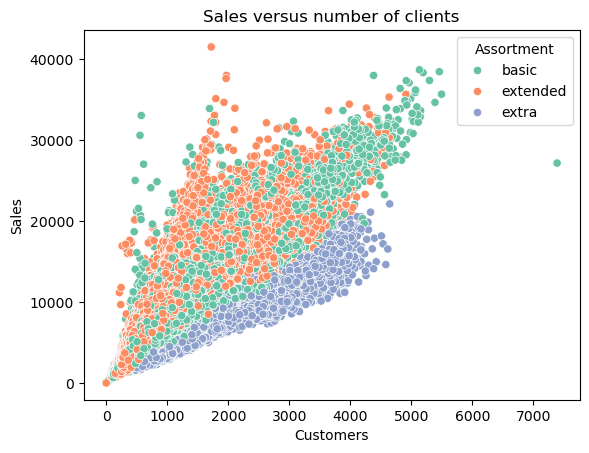

In [10]:
sns.scatterplot(x='Customers', y='Sales', data=sales_stores_df, hue='Assortment').set(title="Sales versus number of clients");

Filialen mit Sortiment von Typ `b` ("extra") haben im Durchschnitt einen größeren Kundenstrom und erzielen höhere Gewinne. Es gibt aber weniger Filialen mit dieser Art von Sortiment. Die Sortimente `basic` und `extended` weisen das beste Verhältnis zwischen Kundenzahl und Umsatz auf.

##### CompetitionDistance

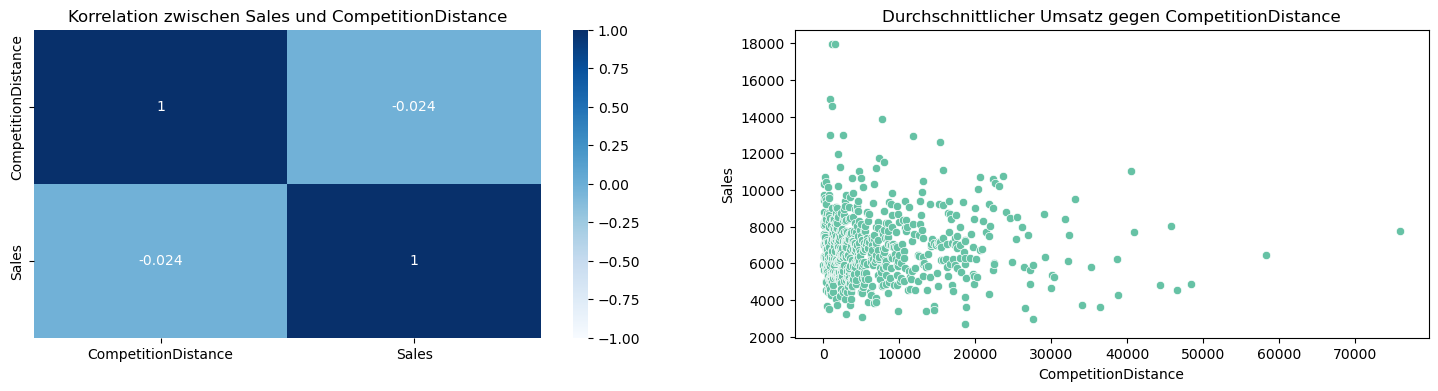

In [11]:
plt.rcParams["figure.figsize"] = (18,4)

comp_dist = sales_stores_df[['CompetitionDistance','Sales']].groupby('CompetitionDistance').mean().reset_index()

plt.subplot(1, 2, 1)
plt.title ("Korrelation zwischen Sales und CompetitionDistance")
sns.heatmap(comp_dist[['CompetitionDistance','Sales']].corr(method = 'pearson'), annot = True, cmap = 'Blues', vmin = -1, vmax = 1)

plt.subplot(1, 2, 2)
plt.title("Durchschnittlicher Umsatz gegen CompetitionDistance");
sns.scatterplot(x='CompetitionDistance', y='Sales', data=comp_dist);

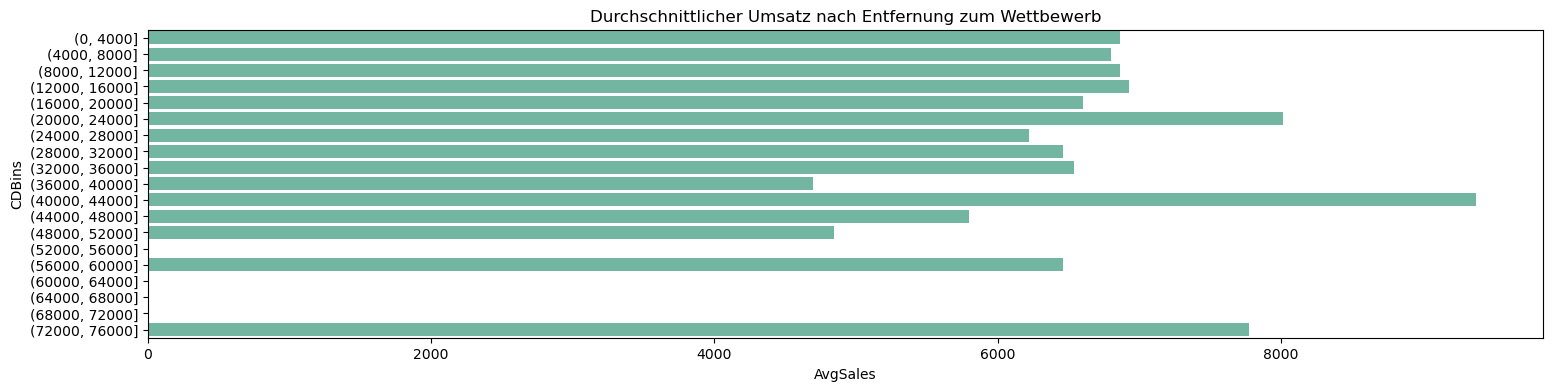

In [12]:
bins = list(np.arange(0,80000, 4000))
comp_dist['CDBins'] = pd.cut(comp_dist['CompetitionDistance'], bins = bins)
comp_dist_avg = comp_dist.groupby('CDBins').agg({'CompetitionDistance':'count', 'Sales': 'sum'}).reset_index()
comp_dist_avg['AvgSales'] = comp_dist_avg['Sales'] / comp_dist_avg['CompetitionDistance']

plt.title ('Durchschnittlicher Umsatz nach Entfernung zum Wettbewerb')
sns.barplot(y = 'CDBins', x = 'AvgSales', data = comp_dist_avg);

Ich erkenne hier keine eindeutige Beziehung und die Korrelation scheint auch niedrig zu sein. Es ist zu beobachten, dass die höchsten Durchschnittsumsätze dort erzielt werden, wo der Wettbewerb am engsten ist. Mir liegen keine Daten über die geografische Lage der Filialen vor, aber ich vermute, dass es sich dabei um Filialen handelt, die sich in Handelskorridoren mit einem hohen Aufkommen an potenziellen Kunden befinden.

##### CompetitionOpenSince

Wir erstellen eine Variable, die die Wettbewerbszeit in Monaten misst.

In [13]:
# We suppose that if CompetitionOpenSince has no value is because there's actually no known competition 
# until the moment where the observation was made (but that is only an assumption)
sales_stores_df['CompetitionOpenSince'] = sales_stores_df.apply(lambda x: x['Date'] \
                                                               if pd.isna(x['CompetitionOpenSince']) == True \
                                                               else x['CompetitionOpenSince'], axis = 1
                                                              )


sales_stores_df['CompetitionTimeDays'] = (sales_stores_df['Date'] - sales_stores_df['CompetitionOpenSince']) // np.timedelta64(1, 'D')
average_days_per_month = 365 / 12
sales_stores_df['CompetitionTimeMonths'] = (sales_stores_df['CompetitionTimeDays'] / average_days_per_month).astype(int)

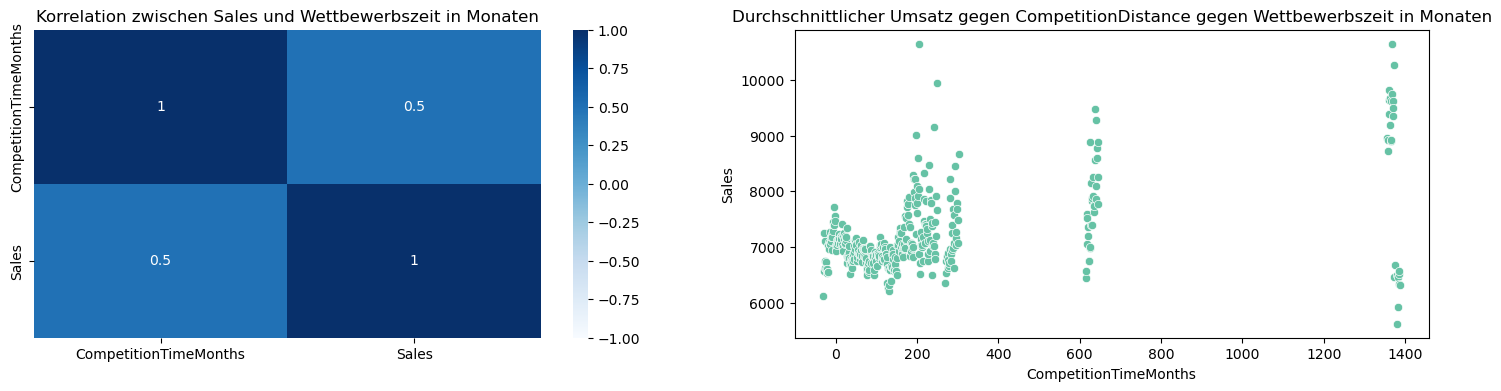

In [14]:
plt.rcParams["figure.figsize"] = (18,4)

comp_time = sales_stores_df[['CompetitionTimeMonths','Sales']].groupby('CompetitionTimeMonths').mean().reset_index()

plt.subplot(1, 2, 1)
plt.title ("Korrelation zwischen Sales und Wettbewerbszeit in Monaten")
sns.heatmap(comp_time[['CompetitionTimeMonths','Sales']].corr(method = 'pearson'), annot = True, cmap = 'Blues', vmin = -1, vmax = 1)

plt.subplot(1, 2, 2)
plt.title("Durchschnittlicher Umsatz gegen CompetitionDistance gegen Wettbewerbszeit in Monaten");
sns.scatterplot(x='CompetitionTimeMonths', y='Sales', data=comp_time);

Ich kann keinen eindeutigen Zusammenhang zwischen der Dauer des Wettbewerbs und den Gewinnen erkennen und die Tatsache, dass mehrere Werte fehlten, macht es noch schwieriger, Schlussfolgerungen zu ziehen.

##### Promo2

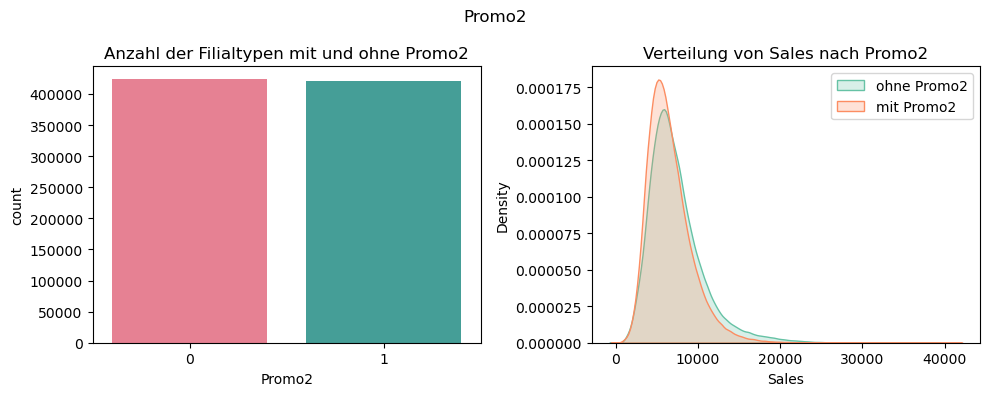

In [15]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title('Anzahl der Filialtypen mit und ohne Promo2')
sns.countplot(x = sales_stores_df['Promo2'], palette='husl')

plt.subplot(1, 2, 2)
plt.title('Verteilung von Sales nach Promo2')
sns.kdeplot(x = sales_stores_df['Sales'][sales_stores_df['Promo2'] == 0] , label = "ohne Promo2", shade = True)
sns.kdeplot(x = sales_stores_df['Sales'][sales_stores_df['Promo2'] == 1] , label = "mit Promo2", shade = True)
plt.legend(labels = ['ohne Promo2','mit Promo2'],loc = 'upper right')

plt.suptitle("Promo2")
plt.tight_layout();

In [16]:
by_promo2 = sales_stores_df.groupby('Promo2')
by_promo2['Sales'].describe(percentiles=[.5])

,count,mean,std,min,50%,max
Promo2,,,,,,
0,423307.0,7350.557935,3394.270985,0.0,6685.0,38722.0
1,421085.0,6558.386062,2725.197952,0.0,6075.0,41551.0


Auf globaler Ebene ist es nicht möglich, einen eindeutigen positiven Einfluss von Promo2 auf die Umsätze zu erkennen.  
Bisher haben wir gesehen, dass Promo2 alle 3 Monate neu gestartet wird. Vielleicht korreliert der Promo2-Neustart mit Umsatzspitzen? Lass uns dies untersuchen:

In [17]:
# Datapoints for stores which participate in Promo2
promo2_df = sales_stores_df[sales_stores_df['Promo2']==1]

months = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
promo2_df['MonthMap'] = promo2_df['Date'].dt.month.apply(lambda x: months[x]) 
# Promo2 is starting if it's already active and we are in a month where it starts
promo2_df['Promo2Start'] = promo2_df.apply(lambda x: 1 if 
                                           (x['MonthMap'] in x['PromoInterval'].split(',')) & (x['Date'] >= x['Promo2Since'])
                                           else 0, axis = 1)

In [18]:
promo2_df.groupby(['Promo2Start'])['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
Promo2Start,,,,,,,,
0,299581.0,6583.694370,2771.434242,0.0,4665.0,6084.0,7945.0,41551.0
1,121504.0,6495.985745,2606.658812,0.0,4671.0,6050.5,7831.0,31523.0


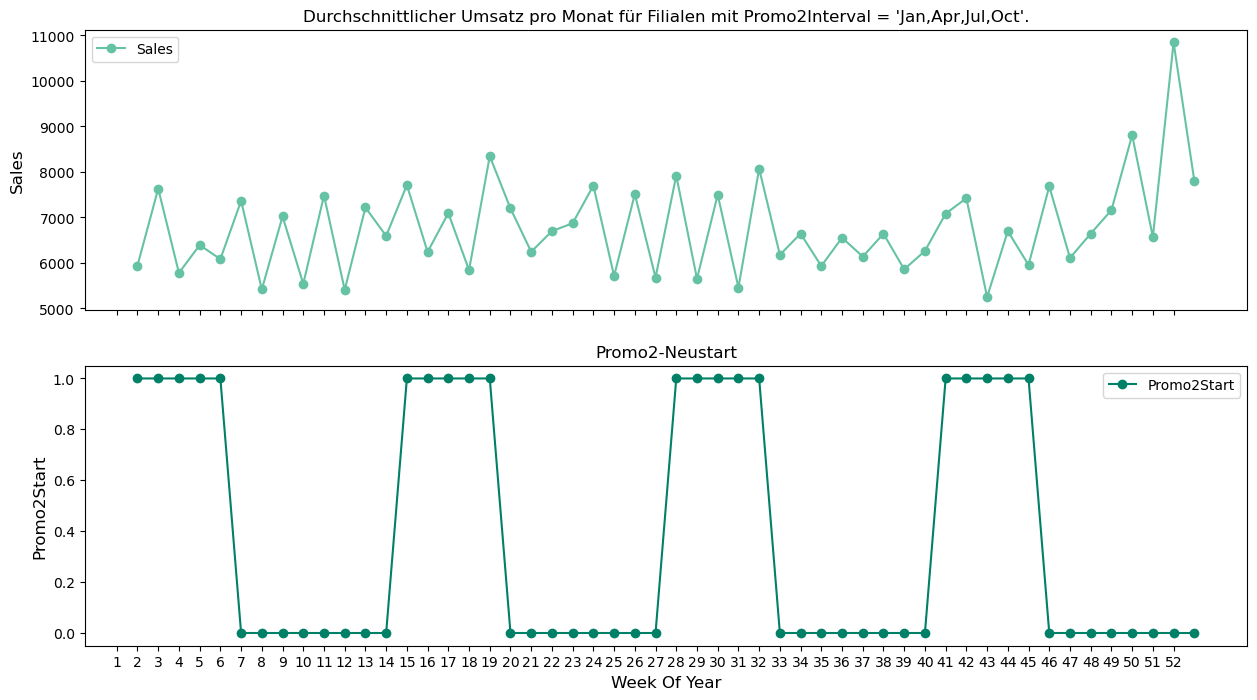

In [19]:
fig, axes = plt.subplots(2,1,sharex=True,figsize=(15,8))

mask = promo2_df['PromoInterval'] == 'Jan,Apr,Jul,Oct'

# Generate monthly time series for sales and customers
promo2_df['WeekOfYear'] = promo2_df['Date'].dt.isocalendar().week
average_sales = promo2_df[mask].groupby('WeekOfYear')['Sales'].mean()
promo2_starts = promo2_df[mask].groupby('WeekOfYear')['Promo2Start'].agg(pd.Series.mode)

# plot these time series
ax1 = average_sales.plot(legend=True, ax=axes[0], marker='o', title="Durchschnittlicher Umsatz pro Monat für Filialen mit Promo2Interval = 'Jan,Apr,Jul,Oct'.")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist())
ax1.set_ylabel('Sales', size=12)

ax2 = promo2_starts.plot(legend=True, ax=axes[1], marker='o', colormap="summer", title="Promo2-Neustart")
ax2.set_ylabel('Promo2Start', size=12)

plt.xlabel('Week Of Year', size=12);

Ich erkenne noch keinen deutlichen Einfluss von Promo2 auf die Umsätze Sollten vielleicht Filialen mit länger laufenden Werbeaktionen mehr verkaufen?

In [20]:
# PromoTimeWeeks=0 if Promo2 was never activated or if it was activated after the observation
sales_stores_df['PromoTimeWeeks'] = sales_stores_df.apply(lambda x: 0 if (pd.isna(x['Promo2Since']) == True) or \
                                                          (x['Promo2Since'] >= x['Date']) \
                                                          else (x['Date'] - x['Promo2Since']) // np.timedelta64(1, 'W'),\
                                                          axis = 1
                                                         )

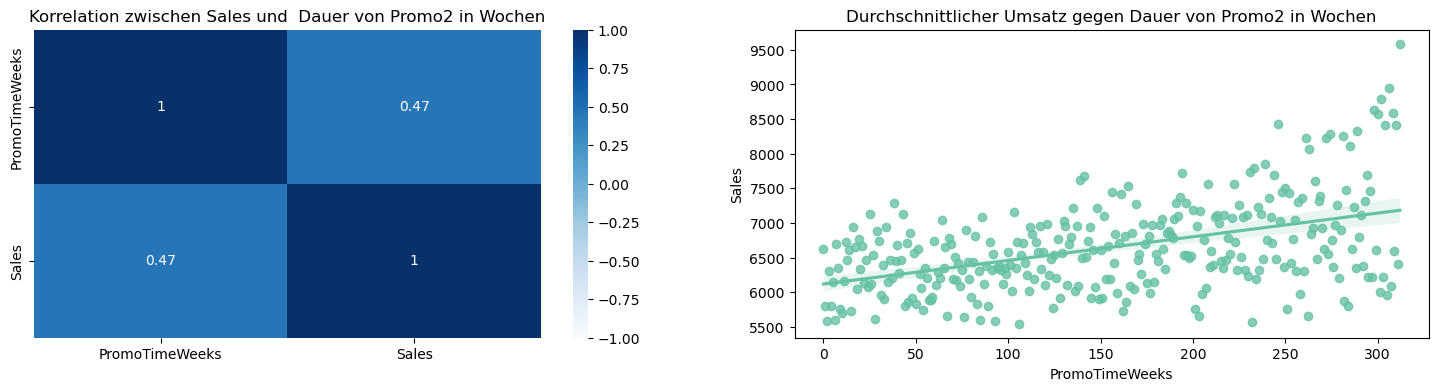

In [21]:
promo2_df = sales_stores_df[sales_stores_df['Promo2']==1]
p2_time = promo2_df[['PromoTimeWeeks','Sales']].groupby('PromoTimeWeeks').mean().reset_index()

plt.rcParams["figure.figsize"] = (18,4)

plt.subplot(1, 2, 1)
plt.title ("Korrelation zwischen Sales und  Dauer von Promo2 in Wochen")
sns.heatmap(p2_time.corr(method = 'pearson'), annot = True, cmap = 'Blues', vmin = -1, vmax = 1)

plt.subplot(1, 2, 2)
plt.title("Durchschnittlicher Umsatz gegen Dauer von Promo2 in Wochen")
sns.regplot(x='PromoTimeWeeks', y='Sales', data=p2_time);

Der Umsatz scheint zu steigen, je länger Promo2 aktiv ist.

Wir erstellen neue Kennzahlen (Features): durchschnittlicher Tagesumsatz, durchschnittliche tägliche Kundenzahl und Umsatz pro Kunde

In [22]:
avgs = sales_stores_df.groupby('Store')[['Sales', 'Customers']].mean().reset_index()
avgs.rename({'Sales': 'AvgSales', 'Customers': 'AvgCustomers'}, axis=1, inplace=True)
# This is the same as total sales / total customers
avgs['SalesPerCustomer'] = avgs.apply(lambda x: x['AvgSales'] / x['AvgCustomers'], axis=1)
 
sales_stores_df = sales_stores_df.merge(avgs, on='Store', how='inner')

In [23]:
# Save data for later use
sales_stores_df.to_csv("../data/sales_stores.csv", index=False)

In [24]:
sales_stores_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,WeekOfYear,...,CompetitionOpenSince,Promo2,Promo2Since,PromoInterval,CompetitionTimeDays,CompetitionTimeMonths,PromoTimeWeeks,AvgSales,AvgCustomers,SalesPerCustomer
0,1,5,2015-07-31,5263,555,1,1,no_holiday,1,31,...,2008-09-01,0,NaT,NaN,2524,82,0,4759.096031,564.049936,8.437366
1,2,5,2015-07-31,6064,625,1,1,no_holiday,1,31,...,2007-11-01,1,2010-03-29,"Jan,Apr,Jul,Oct",2829,93,278,4953.900510,583.998724,8.482725
2,3,5,2015-07-31,8314,821,1,1,no_holiday,1,31,...,2006-12-01,1,2011-04-04,"Jan,Apr,Jul,Oct",3164,104,225,6942.568678,750.077022,9.255808
3,4,5,2015-07-31,13995,1498,1,1,no_holiday,1,31,...,2009-09-01,0,NaT,NaN,2159,70,0,9638.401786,1321.752551,7.292138
4,5,5,2015-07-31,4822,559,1,1,no_holiday,1,31,...,2015-04-01,0,NaT,NaN,121,3,0,4676.274711,537.340180,8.702634


Wie sehen die Verteilungen der neuen Metriken aus?

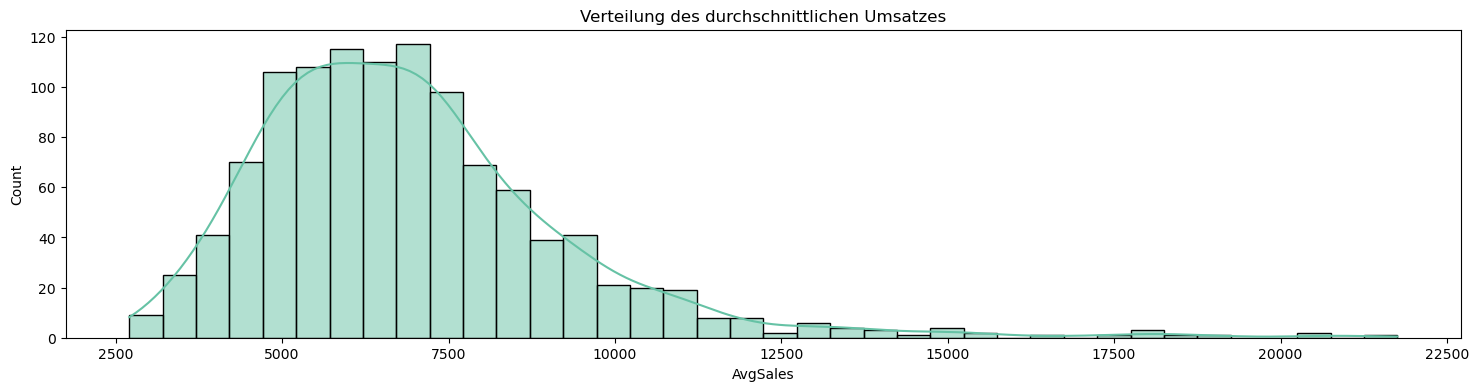

In [25]:
sns.histplot(avgs['AvgSales'], kde=True).set(title="Verteilung des durchschnittlichen Umsatzes");

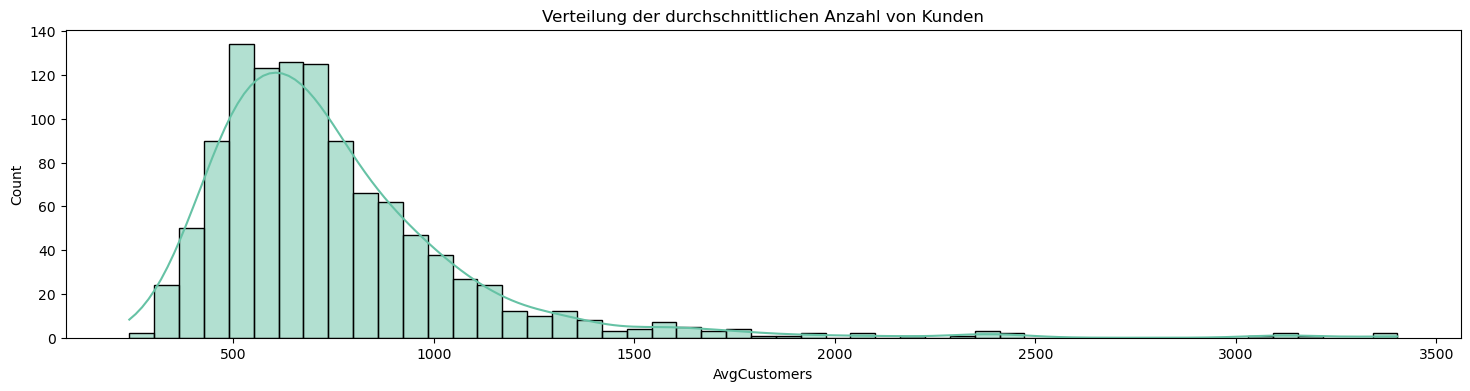

In [26]:
sns.histplot(avgs['AvgCustomers'], kde=True).set(title="Verteilung der durchschnittlichen Anzahl von Kunden");

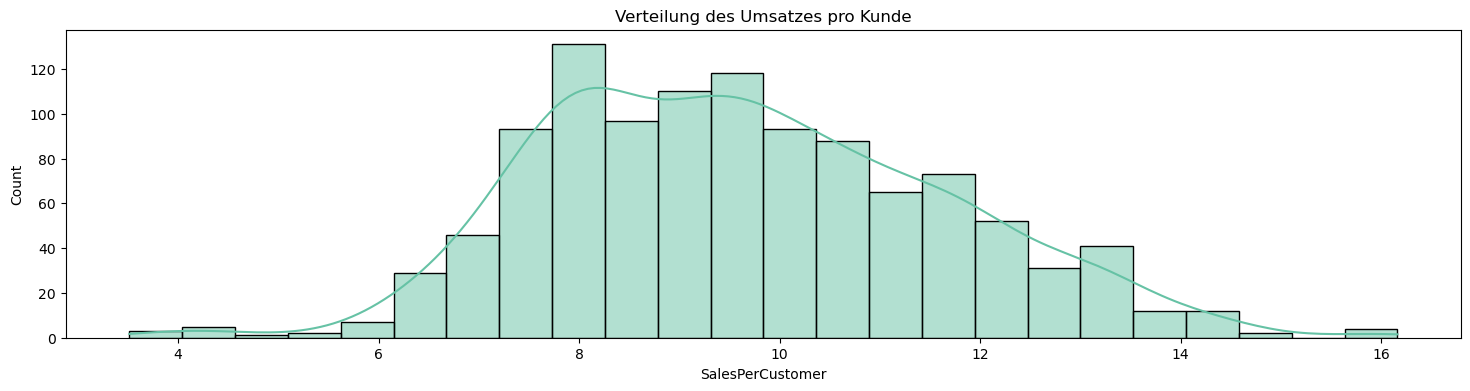

In [28]:
sns.histplot(avgs['SalesPerCustomer'], kde=True).set(title="Verteilung des Umsatzes pro Kunde");

AvgSales und AvgCustomers haben eine Long-Tail-Verteilung, genau wie Sales und Customers